# Determing Optimal Match Number for FDR Calculations (library peak max = 31)

In [37]:
import pandas as pd
from matplotlib import pyplot
pd.set_option('display.max_rows', None)

## Loading Results

In [38]:
spectrum1 = pd.read_csv('FDRGraph_lib20_overall.csv')
spectrum1['group'] = ['lib20' for x in range(len(spectrum1))]
spectrum2 = pd.read_csv('FDRGraph_lib31_overall.csv')
spectrum2['group'] = ['lib31' for x in range(len(spectrum2))]
spectrum3 = pd.read_csv('FDRGraph_lib20_overall_sqrt.csv')
spectrum3['group'] = ['lib20_sqrt' for x in range(len(spectrum3))]
spectrum4 = pd.read_csv('FDRGraph_lib31_overall_sqrt.csv')
spectrum4['group'] = ['lib31_sqrt' for x in range(len(spectrum4))]
spectrum = pd.concat([spectrum1, spectrum2, spectrum3, spectrum4])
spectrum

matches  FDRCutoff    total    cosine  FDRDecoys  totalDecoys       group
0         4          0  1271197  0.000000          0       530432       lib20
1         5          0   794736  0.000000          0       305501       lib20
2         6          0   468035  0.000000          0       162064       lib20
3         7          0   263977  0.000000          0        79953       lib20
4         8          0   145378  0.000000          0        37070       lib20
5         9          0    79783  0.000000          0        16279       lib20
6        10       4636    44825  0.959566         46         6765       lib20
7        11       7817    26138  0.905361         78         2533       lib20
8        12       9037    16029  0.802085         90          906       lib20
9        13       8535    10221  0.607166         85          287       lib20
10       14       6642     6789  0.361131         66           83       lib20
11       15       4494     4494  0.183835         18           19       lib20
12       16       2928     2928  0.183835          2            3       lib20
13       17       1820     1820  0.233103          0            1       lib20
14       18        960      960  0.237252         -1            0       lib20
15       19        378      378  0.364867         -1            0       lib20
16       20        110      110  0.612314         -1            0       lib20
0         4          0  1721198  0.000000          0       750947       lib31
1         5          0  1238220  0.000000          0       511263       lib31
2         6          0   851710  0.000000          0       329460       lib31
3         7          0   562669  0.000000          0       201686       lib31
4         8          0   359198  0.000000          0       117766       lib31
5         9          0   223418  0.000000          0        66084       lib31
6        10          0   136758  0.000000          0        35605       lib31
7        11          0    82793  0.000000          0        18405       lib31
8        12       3590    50495  0.960294         35         9151       lib31
9        13       4719    31143  0.938459         47         4431       lib31
10       14       4962    19710  0.917065         49         2075       lib31
11       15       6042    12853  0.826644         60          911       lib31
12       16       5669     8542  0.742343         56          387       lib31
13       17       4827     5805  0.624921         48          135       lib31
14       18       4042     4112  0.292512         40           48       lib31
15       19       2950     2950  0.123016         19           20       lib31
16       20       2161     2161  0.183819          4            5       lib31
17       21       1612     1612  0.199871          0            1       lib31
18       22       1219     1219  0.231567         -1            0       lib31
19       23        840      840  0.430129         -1            0       lib31
20       24        587      587  0.624319         -1            0       lib31
21       25        385      385  0.624319         -1            0       lib31
22       26        237      237  0.624319         -1            0       lib31
23       27        136      136  0.722453         -1            0       lib31
24       28         90       90  0.722453         -1            0       lib31
25       29         42       42  0.746567         -1            0       lib31
26       30         15       15  0.775904         -1            0       lib31
27       31          4        4  0.775904         -1            0       lib31
0         4          0  1271197  0.000000          0       530432  lib20_sqrt
1         5          0   794736  0.000000          0       305501  lib20_sqrt
2         6          0   468035  0.000000          0       162064  lib20_sqrt
3         7          0   263977  0.000000          0        79953  lib20_sqrt
4         8          0   145378  0.000000          0        37070  lib20_sqrt
5         9       4536    

In [39]:
peptide1 = pd.read_csv('FDRGraph_lib20_peptide.csv')
peptide1['group'] = ['lib20' for x in range(len(peptide1))]
peptide2 = pd.read_csv('FDRGraph_lib31_peptide.csv')
peptide2['group'] = ['lib31' for x in range(len(peptide2))]
peptide3 = pd.read_csv('FDRGraph_lib20_peptide_sqrt.csv')
peptide3['group'] = ['lib20_sqrt' for x in range(len(peptide3))]
peptide4 = pd.read_csv('FDRGraph_lib31_peptide_sqrt.csv')
peptide4['group'] = ['lib31_sqrt' for x in range(len(peptide4))]
peptide = pd.concat([peptide1, peptide2, peptide3, peptide4])
peptide

matches  FDRCutoff   total    cosine  FDRDecoys  totalDecoys       group
0         4          0  148909  0.000000          0        70186       lib20
1         5          0   54934  0.000000          0        23050       lib20
2         6          0   21223  0.000000          0         7371       lib20
3         7          0    9344  0.000000          0         2425       lib20
4         8          0    4850  0.000000          0          817       lib20
5         9          0    2981  0.000000          0          276       lib20
6        10       1020    2050  0.962542         10           78       lib20
7        11       1363    1530  0.863251         13           23       lib20
8        12       1144    1144  0.417803          8            9       lib20
9        13        848     848  0.446441          0            1       lib20
10       14        635     635  0.446441         -1            0       lib20
11       15        449     449  0.715983         -1            0       lib20
12       16        304     304  0.785532         -1            0       lib20
13       17        184     184  0.836720         -1            0       lib20
14       18         95      95  0.899774         -1            0       lib20
15       19         34      34  0.921710         -1            0       lib20
16       20         10      10  0.951157         -1            0       lib20
0         4          0  161742  0.000000          0        77840       lib31
1         5          0   74092  0.000000          0        32608       lib31
2         6          0   35367  0.000000          0        13972       lib31
3         7          0   18214  0.000000          0         6238       lib31
4         8          0    9841  0.000000          0         2824       lib31
5         9          0    5720  0.000000          0         1323       lib31
6        10          0    3609  0.000000          0          591       lib31
7        11          0    2431  0.000000          0          265       lib31
8        12        688    1749  0.968632          6          128       lib31
9        13        810    1304  0.946413          8           54       lib31
10       14        681    1015  0.946413          6           27       lib31
11       15        664     790  0.912439          6           11       lib31
12       16        607     607  0.446879          1            2       lib31
13       17        458     458  0.644434          1            2       lib31
14       18        355     355  0.644434         -1            0       lib31
15       19        260     260  0.644434         -1            0       lib31
16       20        192     192  0.675047         -1            0       lib31
17       21        140     140  0.778974         -1            0       lib31
18       22        104     104  0.778974         -1            0       lib31
19       23         70      70  0.896050         -1            0       lib31
20       24         51      51  0.896050         -1            0       lib31
21       25         27      27  0.896050         -1            0       lib31
22       26         15      15  0.928155         -1            0       lib31
23       27         12      12  0.928155         -1            0       lib31
24       28          9       9  0.928155         -1            0       lib31
25       29          2       2  0.967558         -1            0       lib31
0         4          0  148909  0.000000          0        70186  lib20_sqrt
1         5          0   55145  0.000000          0        23109  lib20_sqrt
2         6          0   21223  0.000000          0         7366  lib20_sqrt
3         7          0    9220  0.000000          0         2362  lib20_sqrt
4         8          0    4739  0.000000          0          788  lib20_sqrt
5         9       1081    2870  0.983379         10          261  lib20_sqrt
6        10       1244    1953  0.972981         12           75  lib20_sqrt
7        11       1368    1460  0.921513         13           19  lib20_sqrt


In [40]:
protein1 = pd.read_csv('FDRGraph_lib20_protein.csv')
protein1['group'] = ['lib20' for x in range(len(protein1))]
protein2 = pd.read_csv('FDRGraph_lib31_protein.csv')
protein2['group'] = ['lib31' for x in range(len(protein2))]
protein3 = pd.read_csv('FDRGraph_lib20_protein_sqrt.csv')
protein3['group'] = ['lib20_sqrt' for x in range(len(protein3))]
protein4 = pd.read_csv('FDRGraph_lib31_protein_sqrt.csv')
protein4['group'] = ['lib31_sqrt' for x in range(len(protein4))]
protein = pd.concat([protein1, protein2, protein3, protein4])
protein

matches  FDRCutoff  total    cosine  FDRDecoys  totalDecoys       group
0         4          0  15928  0.000000          0         7889       lib20
1         5          0   4948  0.000000          0         2190       lib20
2         6          0   1763  0.000000          0          658       lib20
3         7          0    789  0.000000          0          202       lib20
4         8          0    431  0.000000          0           53       lib20
5         9        117    310  0.990037          1           15       lib20
6        10        239    248  0.811613          2            3       lib20
7        11        204    204  0.725786          0            1       lib20
8        12        164    164  0.725786          0            1       lib20
9        13        123    123  0.811613         -1            0       lib20
10       14         94     94  0.811613         -1            0       lib20
11       15         66     66  0.811613         -1            0       lib20
12       16         46     46  0.841632         -1            0       lib20
13       17         24     24  0.937686         -1            0       lib20
14       18         10     10  0.968254         -1            0       lib20
15       19          4      4  0.968254         -1            0       lib20
16       20          2      2  0.968254         -1            0       lib20
0         4          0  16221  0.000000          0         8060       lib31
1         5          0   6110  0.000000          0         2792       lib31
2         6          0   2555  0.000000          0         1039       lib31
3         7          0   1237  0.000000          0          440       lib31
4         8          0    683  0.000000          0          185       lib31
5         9          0    438  0.000000          0           83       lib31
6        10          0    316  0.000000          0           35       lib31
7        11          0    254  0.000000          0           21       lib31
8        12        160    198  0.942956          1           10       lib31
9        13        154    160  0.829006          1            4       lib31
10       14        128    128  0.720504         -1            0       lib31
11       15         98     98  0.720504         -1            0       lib31
12       16         76     76  0.720504         -1            0       lib31
13       17         60     60  0.720504         -1            0       lib31
14       18         48     48  0.888934         -1            0       lib31
15       19         38     38  0.914804         -1            0       lib31
16       20         25     25  0.914804         -1            0       lib31
17       21         18     18  0.914804         -1            0       lib31
18       22         12     12  0.967558         -1            0       lib31
19       24          8      8  0.967558         -1            0       lib31
20       25          5      5  0.967558         -1            0       lib31
21       26          2      2  0.967558         -1            0       lib31
22       29          1      1  0.967558         -1            0       lib31
0         4          0  15928  0.000000          0         7889  lib20_sqrt
1         5          0   4640  0.000000          0         2067  lib20_sqrt
2         6          0   1563  0.000000          0          593  lib20_sqrt
3         7          0    679  0.000000          0          185  lib20_sqrt
4         8          0    349  0.000000          0           39  lib20_sqrt
5         9          0    248  0.000000          0           11  lib20_sqrt
6        10        193    198  0.920557          1            3  lib20_sqrt
7        11        157    157  0.863470         -1            0  lib20_sqrt
8        12        128    128  0.863470         -1            0  lib20_sqrt
9        13        105    105  0.922555         -1            0  lib20_sqrt
10       14         75     75  0.940711         -1            0  lib20_sqrt
11       15         51     51  0.940711         -1  

## Optimal FDR Cutoff

### Spectral Level Analysis

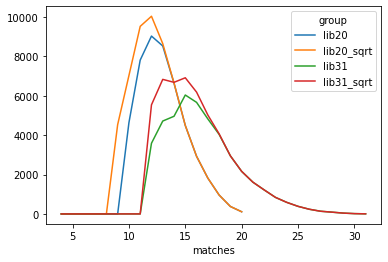

In [41]:
spectrumFDR = spectrum.pivot(index='matches', columns='group', values='FDRCutoff')
spectrumFDR.plot()

### Peptide Level Analysis

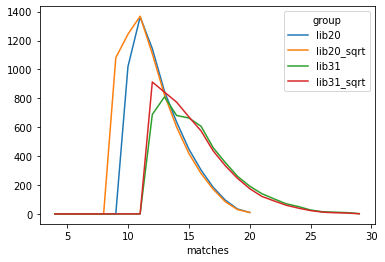

In [42]:
peptideFDR = peptide.pivot(index='matches', columns='group', values='FDRCutoff')
peptideFDR.plot()

### Protein Level Analysis

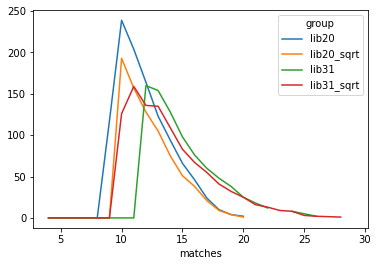

In [43]:
proteinFDR = protein.pivot(index='matches', columns='group', values='FDRCutoff')
proteinFDR.plot()

## Percentage FDR Representation

### Data Rearrangement

In [44]:
spectrum = spectrum.reset_index(drop=True)
peptide = spectrum.reset_index(drop=True)
protein = protein.reset_index(drop=True)

spectrum['%'] = [(spectrum['FDRCutoff'].loc[i]/spectrum['total'].loc[i]) for i in range(len(spectrum))]
peptide['%'] = [(peptide['FDRCutoff'].loc[i]/peptide['total'].loc[i]) for i in range(len(peptide))]
protein['%'] = [(protein['FDRCutoff'].loc[i]/protein['total'].loc[i]) for i in range(len(protein))]

### Spectrum Level Analysis

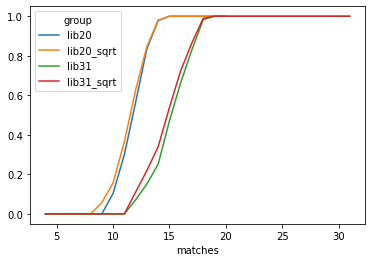

In [45]:
spectrumPerc = spectrum.pivot(index='matches', columns='group', values='%')
spectrumPerc.plot()

### Peptide Level Analysis

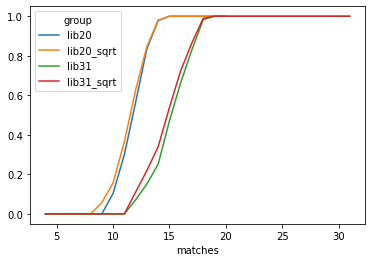

In [46]:
peptidePerc = peptide.pivot(index='matches', columns='group', values='%')
peptidePerc.plot()

### Protein Level Analysis

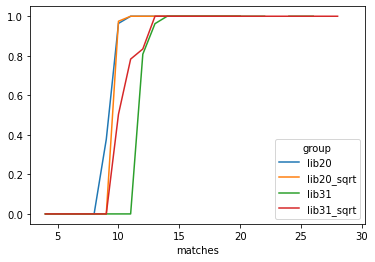

In [47]:
proteinPerc = protein.pivot(index='matches', columns='group', values='%')
proteinPerc.plot()

## Cosine

### Spectrum Level Analysis

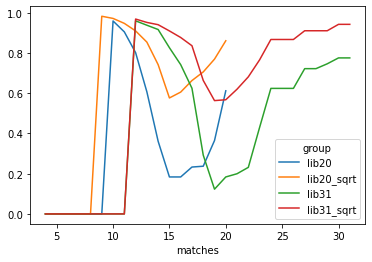

In [48]:
spectrumCos = spectrum.pivot(index='matches', columns='group', values='cosine')
spectrumCos.plot()

### Peptide Level Analysis

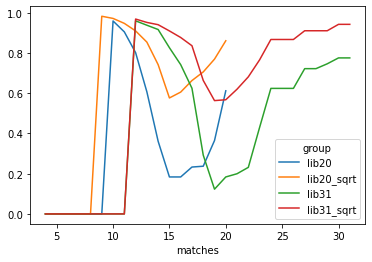

In [49]:
peptideCos = peptide.pivot(index='matches', columns='group', values='cosine')
peptideCos.plot()

### Protein Level Analysis

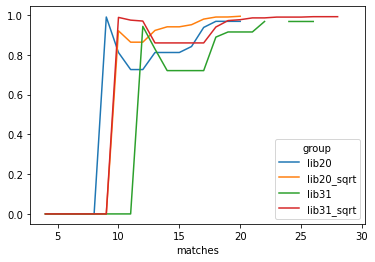

In [50]:
proteinCos = protein.pivot(index='matches', columns='group', values='cosine')
proteinCos.plot()

## Decoys (total)

### Spectral Level Analysis

(0.0, 1000.0)

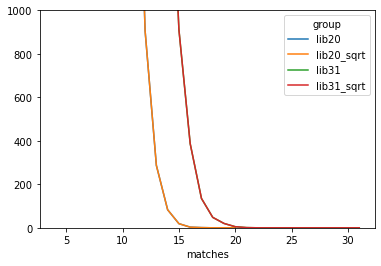

In [51]:
spectrumDec = spectrum.pivot(index='matches', columns='group', values='totalDecoys')
p1 = spectrumDec.plot()
p1.set_ylim(0,1000)

### Peptide Level Analysis

(0.0, 1000.0)

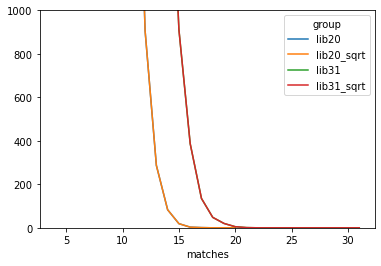

In [52]:
peptideDec = peptide.pivot(index='matches', columns='group', values='totalDecoys')
p2 = peptideDec.plot()
p2.set_ylim(0,1000)

### Protein Level Analysis

(0.0, 1000.0)

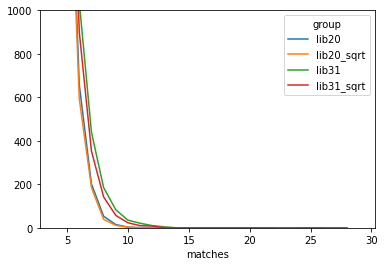

In [53]:
proteinDec = protein.pivot(index='matches', columns='group', values='totalDecoys')
p3 = proteinDec.plot()
p3.set_ylim(0,1000)

## Histograms

### Getting all the data set up

In [54]:
spec20nMax = spectrum1.at[spectrum1['FDRCutoff'].idxmax(),'matches']
spec31nMax = spectrum2.at[spectrum2['FDRCutoff'].idxmax(),'matches']
spec20yMax = spectrum3.at[spectrum3['FDRCutoff'].idxmax(),'matches']
spec31yMax = spectrum4.at[spectrum4['FDRCutoff'].idxmax(),'matches']
pep20nMax = peptide1.at[peptide1['FDRCutoff'].idxmax(),'matches']
pep31nMax = peptide2.at[peptide2['FDRCutoff'].idxmax(),'matches']
pep20yMax = peptide3.at[peptide3['FDRCutoff'].idxmax(),'matches']
pep31yMax = peptide4.at[peptide4['FDRCutoff'].idxmax(),'matches']
pro20nMax = protein1.at[protein1['FDRCutoff'].idxmax(),'matches']
pro31nMax = protein2.at[protein2['FDRCutoff'].idxmax(),'matches']
pro20yMax = protein3.at[protein3['FDRCutoff'].idxmax(),'matches']
pro31yMax = protein4.at[protein4['FDRCutoff'].idxmax(),'matches']

In [55]:
spec20n = pd.read_csv('../fullOutput_lib20_match3_ppm10.csv').sort_values('cosine', ascending=False)
spec20n = spec20n.reset_index(drop=True)
pep20n = spec20n.drop_duplicates(subset='peptide', keep='first')
pep20n = pep20n[pep20n['shared'] >= pep20nMax]
pep20n = pep20n.reset_index(drop=True)
pro20n = spec20n.drop_duplicates(subset='protein', keep='first')
pro20n = pro20n[pro20n['shared'] >= pro20nMax]
pro20n = pro20n.reset_index(drop=True)
spec20n = spec20n[spec20n['shared'] >= spec20nMax]
spec20n = spec20n.reset_index(drop=True)

In [56]:
spec31n = pd.read_csv('../fullOutput_lib31_match3_ppm10.csv').sort_values('cosine', ascending=False)
spec31n = spec31n.reset_index(drop=True)
pep31n = spec31n.drop_duplicates(subset='peptide', keep='first')
pep31n = pep31n[pep31n['shared'] >= pep31nMax]
pep31n = pep31n.reset_index(drop=True)
pro31n = spec31n.drop_duplicates(subset='protein', keep='first')
pro31n = pro31n[pro31n['shared'] >= pro31nMax]
pro31n = pro31n.reset_index(drop=True)
spec31n = spec31n[spec31n['shared'] >= spec31nMax]
spec31n = spec31n.reset_index(drop=True)

In [57]:
spec20y = pd.read_csv('../fullOutput_lib20_match3_ppm10_sqrt.csv').sort_values('cosine', ascending=False)
spec20y = spec20y.reset_index(drop=True)
pep20y = spec20y.drop_duplicates(subset='peptide', keep='first')
pep20y = pep20y[pep20y['shared'] >= pep20yMax]
pep20y = pep20y.reset_index(drop=True)
pro20y = spec20y.drop_duplicates(subset='protein', keep='first')
pro20y = pro20y[pro20y['shared'] >= pro20yMax]
pro20y = pro20y.reset_index(drop=True)
spec20y = spec20y[spec20y['shared'] >= spec20yMax]
spec20y = spec20y.reset_index(drop=True)

In [58]:
spec31y = pd.read_csv('../fullOutput_lib31_match3_ppm10_sqrt.csv').sort_values('cosine', ascending=False)
spec31y = spec31y.reset_index(drop=True)
pep31y = spec31y.drop_duplicates(subset='peptide', keep='first')
pep31y = pep31y[pep31y['shared'] >= pep31yMax]
pep31y = pep31y.reset_index(drop=True)
pro31y = spec31y.drop_duplicates(subset='protein', keep='first')
pro31y = pro31y[pro31y['shared'] >= pro31yMax]
pro31y = pro31y.reset_index(drop=True)
spec31y = spec31y[spec31y['shared'] >= spec31yMax]
spec31y = spec31y.reset_index(drop=True)

### Spectral Level Analysis, lib20, no square root

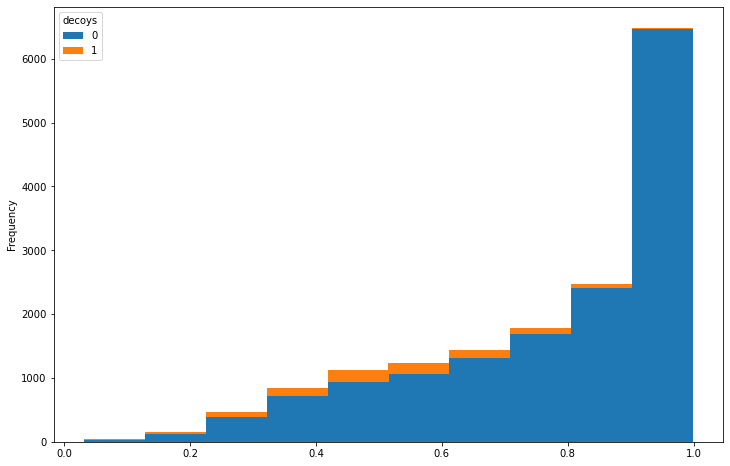

In [59]:
decoys = [1 if 'DECOY' in x else 0 for x in spec20n['protein'] ]
spec20n['decoys'] = decoys
spec20n.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Peptide Level Analysis, lib20, no square root

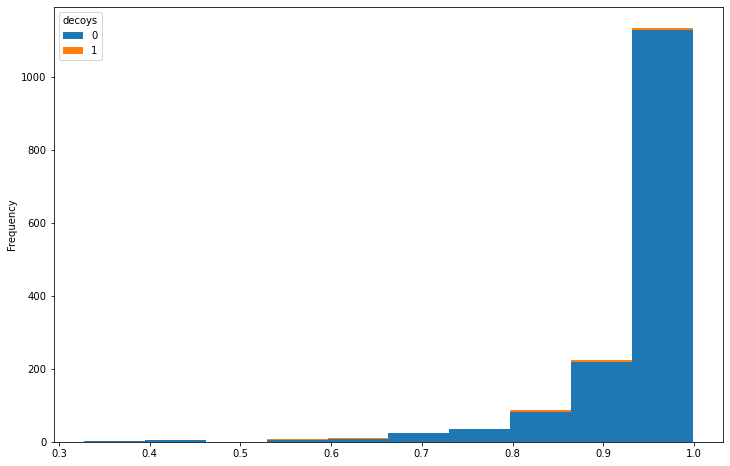

In [60]:
decoys = [1 if 'DECOY' in x else 0 for x in pep20n['protein'] ]
pep20n['decoys'] = decoys
pep20n.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Protein Level Analysis, lib20, no square root

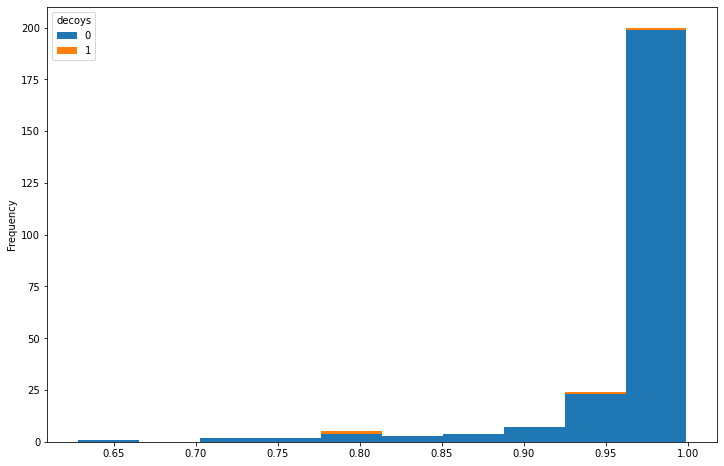

In [61]:
decoys = [1 if 'DECOY' in x else 0 for x in pro20n['protein'] ]
pro20n['decoys'] = decoys
pro20n.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Spectral Level Analysis, lib31, no square root

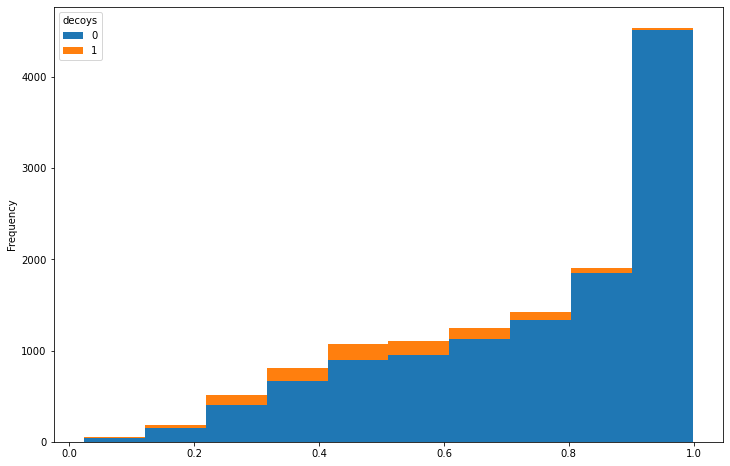

In [62]:
decoys = [1 if 'DECOY' in x else 0 for x in spec31n['protein'] ]
spec31n['decoys'] = decoys
spec31n.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Peptide Level Analysis, lib31, no square root

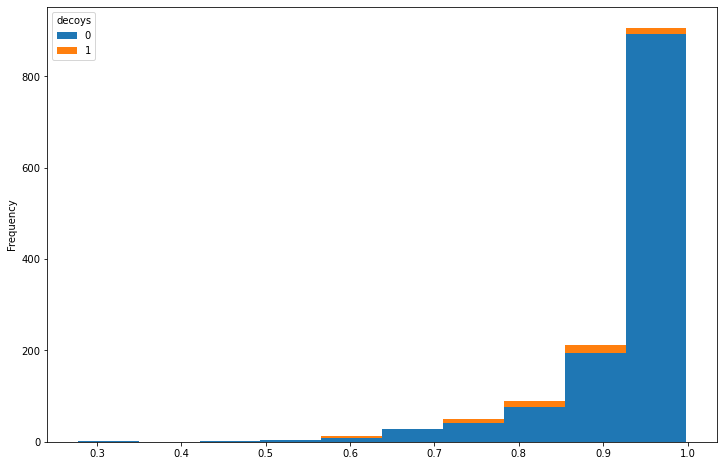

In [63]:
decoys = [1 if 'DECOY' in x else 0 for x in pep31n['protein'] ]
pep31n['decoys'] = decoys
pep31n.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Protein Level Analysis, lib31, no square root

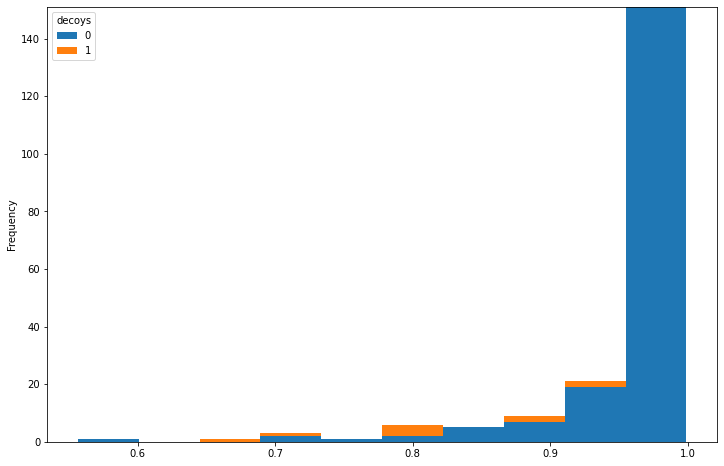

In [64]:
decoys = [1 if 'DECOY' in x else 0 for x in pro31n['protein'] ]
pro31n['decoys'] = decoys
pro31n.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Spectral Level Analysis, lib20, square root

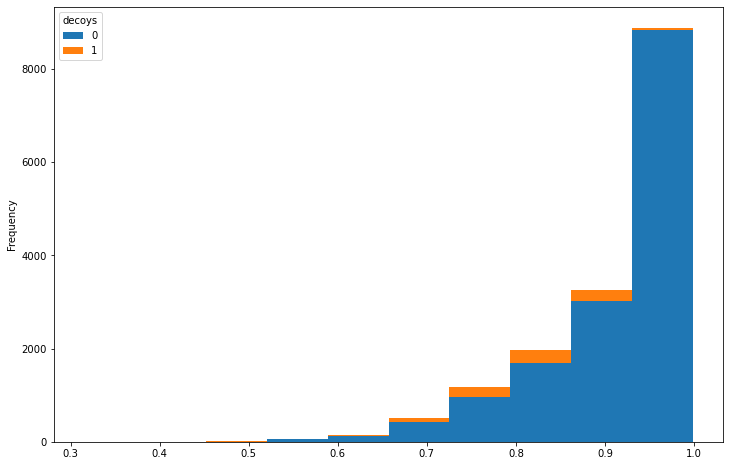

In [65]:
decoys = [1 if 'DECOY' in x else 0 for x in spec20y['protein'] ]
spec20y['decoys'] = decoys
spec20y.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Peptide Level Analysis, lib20, square root

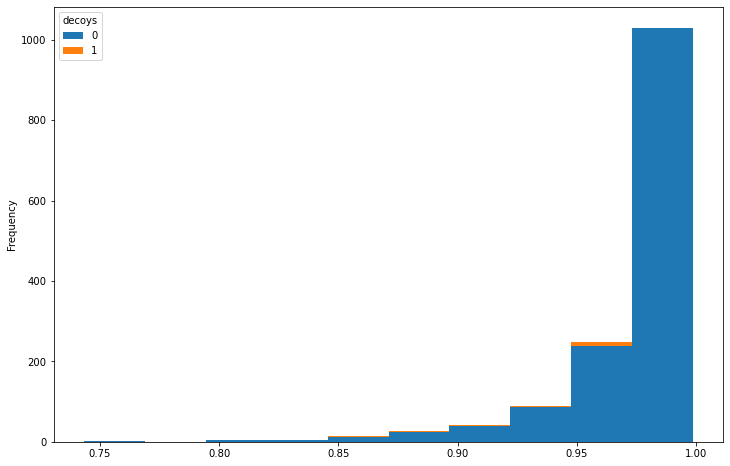

In [66]:
decoys = [1 if 'DECOY' in x else 0 for x in pep20y['protein'] ]
pep20y['decoys'] = decoys
pep20y.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Protein Level Analysis, lib20, square root

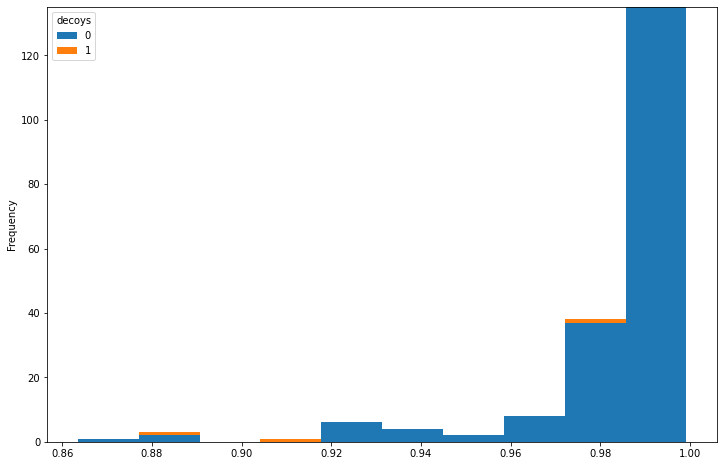

In [67]:
decoys = [1 if 'DECOY' in x else 0 for x in pro20y['protein'] ]
pro20y['decoys'] = decoys
pro20y.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Spectral Level Analysis, lib31, square root

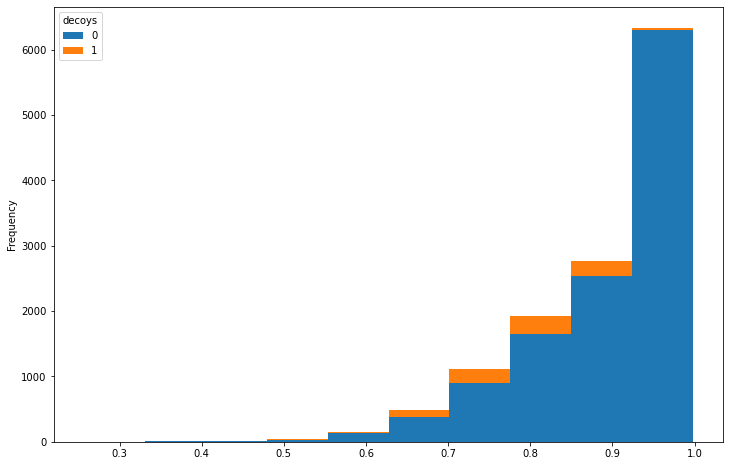

In [68]:
decoys = [1 if 'DECOY' in x else 0 for x in spec31y['protein'] ]
spec31y['decoys'] = decoys
spec31y.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Peptide Level Analysis, lib31, square root

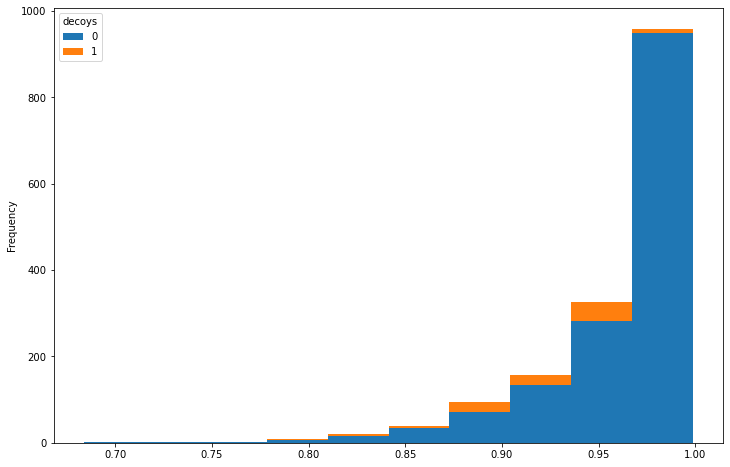

In [69]:
decoys = [1 if 'DECOY' in x else 0 for x in pep31y['protein'] ]
pep31y['decoys'] = decoys
pep31y.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))

### Protein Level Analysis, lib31, square root

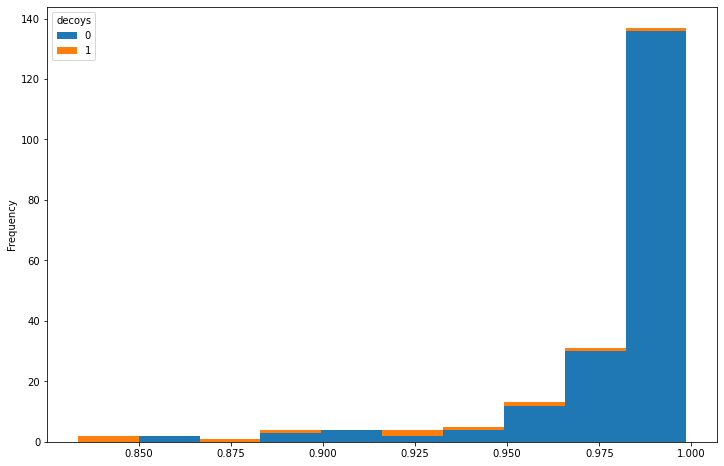

In [70]:
decoys = [1 if 'DECOY' in x else 0 for x in pro31y['protein'] ]
pro31y['decoys'] = decoys
pro31y.pivot(columns='decoys').cosine.plot(kind = 'hist', stacked=True, figsize=(12,8))